## LB02.0 Naive Bayes

You are asked to design an automated system to detect breast cancer that uses features computed from image data displaying cell structures. In a first feasibility study, you decided to apply a Naive Bayes classifier to a dataset based on image analysis of microscopic cell material gathered with the fine needle aspiration (FDA) method.

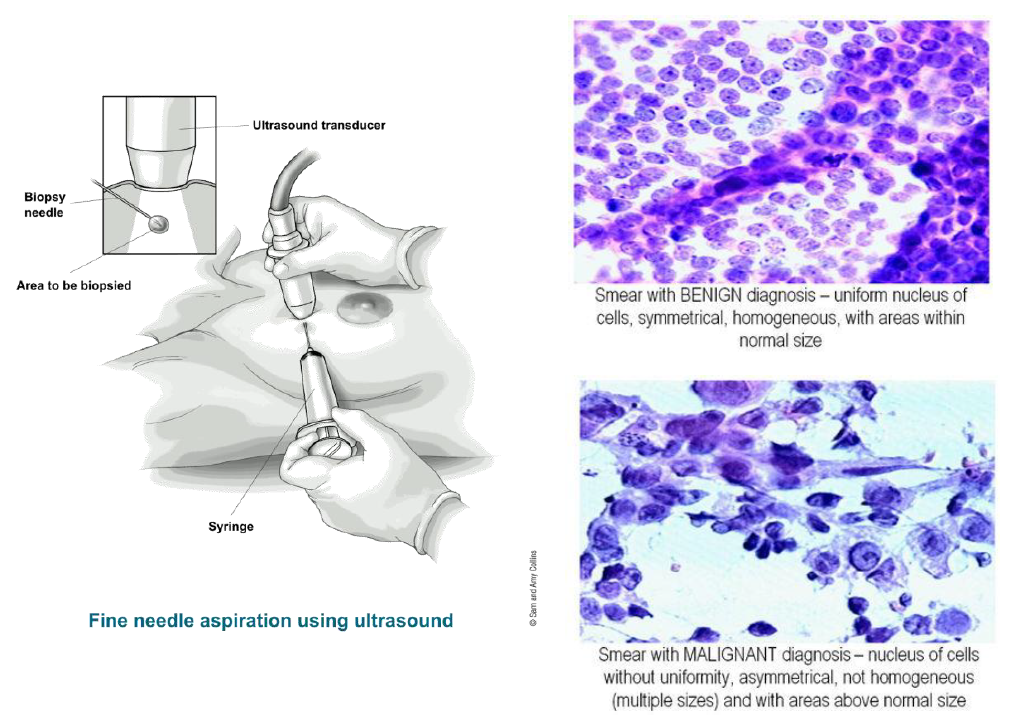

Check the paper ["Nuclear Feature Extraction For Breast Tumor Diagnosis”, SPIE, 1993](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf?sequence=1) for more info on the following dataset.

If you need more information on the python modules you are about to use, refer to the following documentations:
* [SciKit-Learn](https://scikit-learn.org/stable/modules/classes.html)
* [Pandas](https://pandas.pydata.org/docs/reference/index.html#api)
* [Seaborn](https://seaborn.pydata.org/api.html)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.naive_bayes import GaussianNB    
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# This function is needed later when evaluating the classifier's results.
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3, out=None)  
    
    
    thresh = cm.max() / 2.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LB02.1 Explorative Data Analysis (15%)
Before you start to train the Naive Bayes classifier, you first have to take a look at the dataset provided. The first step in each data science project revolves around cleaning, understanding and preprocessing your data.

### LB02.1 a) Read data 
Specify path to the CSV containing breast cancer data and load it into memory using pandas.

In [ ]:
path = ...
df = pd.read_csv(path, sep=';')

### LB02.1 b) Get an idea of the structure of the dataset

* Is the dataset complete?
* What does benign and malignant mean?
* How many samples does each class consist of?

## LB02.2 Sampling (and Scaling) (5%)
After you took care of the preprocessing steps, you have to set aside a portion of the dataset which will be used as test data. It is necessary to have unseen test data in order to evaluate the ability of your classifier to generalize to unseen data.

### LB02.2 a) Extract Labels
Construct X and y. Where X contains all numeric columns that are possible feature candidates and y denotes the corresponding labels. 

In [ ]:
y = ...
X = ...

### LB02.2 b) Transform labels to categorical values

In a medical setting:
- **True positive**: Sick people correctly identified as sick
- **False positive**: Healthy people incorrectly identified as sick
- **True negative**: Healthy people correctly identified as healthy
- **False negative**: Sick people incorrectly identified as healthy


Be sure to assign 0 to each label denoted as 'benign' and 1 to each label denoted as 'malignant'.

### LB02.2 c) Split your dataset into a train set and test set to be able to train and evaluate the classifier.

### LB02.2 d) Feature Scaling
If you want to make use of feature scaling, use sklearn's `StandardScaler` from the preprocessing module.
Be sure to fit the `StandardScaler` only on the train data set!

## LB02.3 Training & Testing (10%)
Now comes the fun part. We instantiante a classifier object and use its `fit()` method to fit the classifier to the data. When that is done, calling the `predict()` function with the test set lets our classifier try its best to perform a classification on unseen data.

### LB02.3 a) Train a Naive Bayes (Minimum Error) classifier using your train data.

### LB02.3 b) Feed the testing data into the classifier and retrieve predictions.

### LB02.3 c) Repeat LB02.3 a) and LB02.3 b) for the scaled dataset

## LB02.4 Evaluation (10%)
After testing has finished, we need to evaluate the performance exhibited by our classifier. Many tools may be used here, with the confusion matrix being a simple and effective option to choose.

### LB02.4 a) Accuracy and Confusion Matrix
Compute accuracy and confusion matrix for both classifiers (scaled and not scaled)

In [ ]:
acc = ...
acc_sc = ...

print("Accuracy for naive Bayes minimum error classifier: {:.4f}".format(acc))
print("Accuracy for naive Bayes minimum error classifier (scaled): {:.4f}".format(acc_sc))

## LB02.5 Feature Selection (15%)
Now that we identified two different ways to train a Naive Bayes classifier (with scaled as well as unscaled data), we want to check if the usage of feature engineering may have a positive effect on our automated breast cancer detection system.

### LB02.5 a) Correlation Heatmap
Take a look at the correlation heatmap to determine if you are able to eliminate redundant columns to reduce dimensionality without losing the discriminative power of the dataset.

### LB02.5 b) Drop highly correlated features (columns)
Drop either of the two features where correlation >= 0.9.

### LB02.5 c) Repeat LB02.3 a) and LB02.3 b) for the dataset with the selected number of features

### LB02.5 d) Repeat LB02.4 a) for the dataset with the selected number of features

In [ ]:
acc_sel = ...

print("Accuracy for naive Bayes minimum error classifier: {:.4f}".format(acc))
print("Accuracy for naive Bayes minimum error classifier (scaled): {:.4f}".format(acc_sc))
print("Accuracy for naive Bayes minimum error classifier (selected): {:.4f}".format(acc_sel))

## LB02.6 Stratified K Fold Validation (20%)
Now that you trained the Naive Bayes Minimum Error classifier in three different ways, you need to decide which of these classifiers produces the best result. To achieve this, you need to try to eliminate randomness to get a better idea of the performance of each model. Cross validatation is one tool that you can use to assess how the results of the classification will generalize to an independent dataset.

### LB02.6 a) Classifier Comparison
Perform a stratified 10-fold cross validation (scikit-learn: `cross_val_score`) and score for accuracy. Output the mean accuracy and its 95% confidence interval (Hint: 2-Sigma rule).

Do this for all three classifiers (Naive Bayes, Naive Bayes with scaling, Naive Bayes with selected features).

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Hint: You will need a pipeline object when properly applying standard scaler to the data folds used in training
from sklearn.pipeline import Pipeline

cv_folds = ...
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=None)

print('Naive Bayes:')
print('Mean crossfold accuracy: \t {:.4f} (+/-{:.4f})'.format(cv_mean, ci))

print('\nNaive Bayes (scaled):')
print('Mean crossfold accuracy: \t {:.4f} (+/-{:.4f})'.format(cv_mean, ci))

print('\nNaive Bayes (selected features):')
print('Mean crossfold accuracy: \t {:.4f} (+/-{:.4f})'.format(cv_mean, ci))

## LB02.7 Naive Bayes Minimum Risk Classifier (25%)
Since detecting cancer is of great importance to the survival chances of a patient, an automatic system detecting breast cancer needs to recognize as many potential cancer symptoms as possible.

This is why scoring for accuracy might not be the best idea when deciding for a classifier to use. Instead, we need to focus on sensitivity to minimize the risk for the patients involved. With a Naive Bayes classifier, there is the possibility of multiplying the classifier's results with a cost/risk/loss matrix $\lambda$.


Multiplying the probabilities put out by a Naive Bayes classifier with a cost matrix leads to a Minimum Risk classifier.
With this type of classifier, one can optimize for distinct metrics: specificity and sensitivity (among others).

According to ["Pattern Classification", Duda et al, 2001](https://github.com/dazzz/patrec2015/blob/master/Pattern%20Classification%20by%20Richard%20O.%20Duda%2C%20David%20G.%20Stork%2C%20Peter%20E.Hart%20.pdf) (Chapter 2.2 Bayesian Decision Theory - Continuous Features):

Decide for $C_1$ if $(\lambda_{21} - \lambda_{11}) . P[C_1 | \vec{x}]$ > $(\lambda_{12} - \lambda_{22}) . P[C_2 | \vec{x}]$, otherwise decide for $C_2$

Cost matrix $\lambda$:
$\begin{bmatrix} 
0 & 1 \\
1 & 0 
\end{bmatrix}$ =
$\begin{bmatrix} 
TP & FP \\
FN & TN 
\end{bmatrix}$=
$\begin{bmatrix} 
(0,0) & (0,1) \\
(1,0) & (1,1) 
\end{bmatrix}$ $\bigg($ Duda et al.: $=
\begin{bmatrix} 
(1,1) & (1,2) \\
(2,1) & (2,2) 
\end{bmatrix}\bigg)$

More information can also be found in S. Wegenkittl: Lecture on Machine Learning (Slides: 78ff)

### LB02.7 a) Training and Evaluation
Train the Naive Bayes classifier and let it predict probabilities (Hint: use `predict_proba`). Convert the Naive Bayes Minimum Error classifier into a minimum risk classifier by introducing a cost/risk/loss matrix $\lambda$.

How does the loss matrix have to look like in order to achieve the exact same result as a Naive Bayes Minimum Error Classifier? 

**Answer**: 

### LB02.7 b) Confusion Matrix
Plot the confusion matrix for the Naive Bayes Minimum Risk classifier.

### LB02.7 c) Sensitivity and Specificity

#### Sensitivity
Sensitivity refers to the medical test's ability to correctly detect ill patients who do have the disease. A high sensitivity test is reliable when its result is negative, since it rarely misdiagnoses those who have the disease. A test with 100% sensitivity will recognize all patients with the disease by testing positive. Sensitivity by definition does not take into account false positives, hence it cannot be used for ruling out a disease.

$Sensitivity = TPR = \frac{TP}{TP+FP}$

#### Specifity
Specificity relates to the test's ability to correctly reject healthy patients without a disease. Specificity of a test is the proportion of healthy patients known not to have the disease, who will test negative for it. A positive result in a test with high specificity is useful for ruling a disease. The test rarely gives positive results in healthy patients.

$Specificity = TNR = \frac{TN}{TN+FP}$

Print accuracy, sensitivity and specificity of the minimum risk classifier.

In [ ]:
acc_minrisk = ...
sensitivity = ...
specificity = ...

print("\nAccuracy for naive Bayes minimum risk classifier: {:.4f}".format(acc_minrisk))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specifity: {:.4f}".format(specificity))

### LB02.7 d) Sensitivity Optimization

Change the values of the `cost_matrix` in LB02.7 a) to achieve a sensitivity of > 0.98.
Pay attention and try to understand how the values of accuracy, sensitivity and specificity correlate.